In [2]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
from huggingface_hub import login
from google.colab import userdata

key = userdata.get('newtoken_0192')
login(key)

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

image_encoder%2Fconfig.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

(…)age_processor%2Fpreprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

prior%2Fconfig.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Kandinsky 2.2 (Colab Optimized): Enter your prompt for image generation (or type 'exit' to quit):
Kandinsky 2.2 Prompt: A mystical forest at twilight, with a glowing ancient portal covered in bioluminescent vines. Fireflies swirl around, and the air shimmers with magical energy. The portal reveals a breathtaking parallel universe beyond, filled with floating islands and ethereal creatures.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

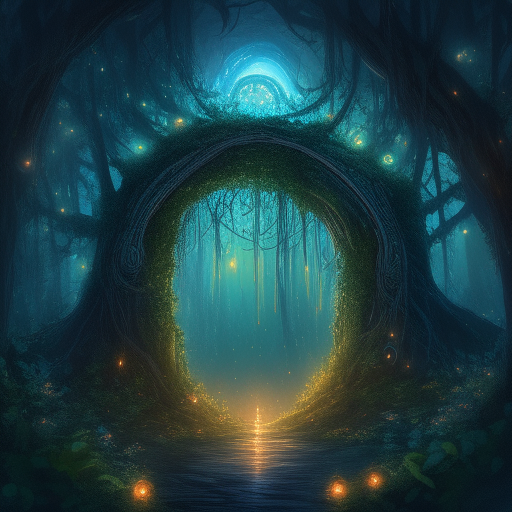

Kandinsky 2.2 Prompt: A highly advanced humanoid robot with a sleek, cybernetic design, glowing blue circuits across its metallic body. The robot is self-aware, gazing into the horizon with a deep expression. Hyperrealistic, cinematic lighting, science fiction aesthetics.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

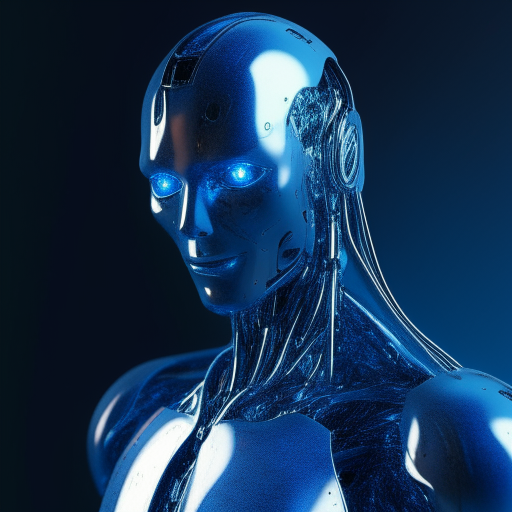

Kandinsky 2.2 Prompt: An astronaut exploring a mysterious alien planet with towering crystalline structures and exotic glowing plants. The sky is a blend of deep purples and blues, with two moons visible in the background. The astronaut looks in awe at a floating energy sphere.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

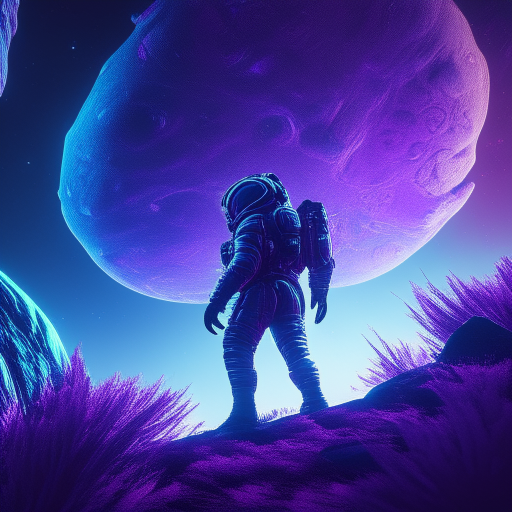

Kandinsky 2.2 Prompt: Exit
Exiting Kandinsky 2.2 chat. Goodbye!


In [3]:
import gc
import torch
from diffusers import KandinskyV22Pipeline, KandinskyV22PriorPipeline
import IPython.display as display
from PIL import Image

# Clear GPU memory before loading
gc.collect()
torch.cuda.empty_cache()

# Enable memory-efficient computation
torch.backends.cuda.matmul.allow_tf32 = True

# Load both the text-to-image prior & the image decoder
prior = KandinskyV22PriorPipeline.from_pretrained(
    "kandinsky-community/kandinsky-2-2-prior",
    torch_dtype=torch.float16
).to("cuda")

pipe_kandinsky = KandinskyV22Pipeline.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder",
    torch_dtype=torch.float16
).to("cuda")

def chat():
    print("Kandinsky 2.2 (Colab Optimized): Enter your prompt for image generation (or type 'exit' to quit):")
    while True:
        prompt = input("Kandinsky 2.2 Prompt: ")
        if prompt.lower() == "exit":
            print("Exiting Kandinsky 2.2 chat. Goodbye!")
            break

        # Generate text embeddings using the prior
        generator = torch.Generator("cuda").manual_seed(42)
        prior_output = prior(prompt=prompt, generator=generator)
        image_embeds = prior_output.image_embeds
        negative_image_embeds = prior_output.negative_image_embeds

        # Generate images from text embeddings
        num_images = 1  # Keep 1 image per prompt to avoid OOM
        result = pipe_kandinsky(
            image_embeds=image_embeds,
            negative_image_embeds=negative_image_embeds,
            height=512,  # Colab-friendly resolution
            width=512,
            num_inference_steps=20,  # Optimized for speed & quality
            generator=generator,
            num_images_per_prompt=num_images
        )

        # Save & display images
        for i, image in enumerate(result.images):
            image_path = f"kandinsky_generated_{i+1}.png"
            image.save(image_path)
            display.display(image)

chat()
